In [30]:
# loading the dataset from tensorflow directly
import tensorflow as tf
tf.random.set_seed(43)

fashion_mnist_dataset = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_dataset.load_data()

In [31]:
# class names are not included in the dataset's labels, so we include them here to make plotting in the future easier
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

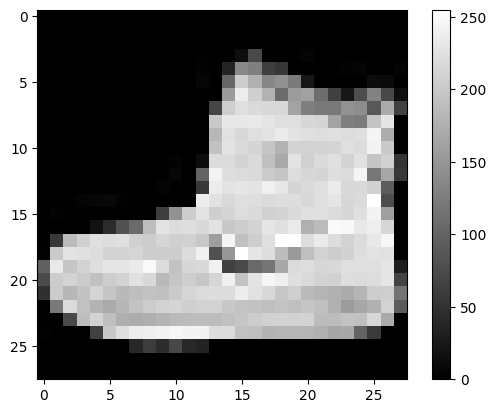

In [32]:
# printing one of the images, to verify that we loaded the dataset correctly
from matplotlib import pyplot as plt 
clothing_item = train_images[0]
plt.figure()
plt.imshow(clothing_item, cmap="gray")
plt.colorbar()
plt.show()

In [33]:
# normalizing pixel data to be in the range from 0-1 in order to improve training later on
train_images = train_images / 255.0
test_images = test_images / 255.0

In [34]:
# reshape images to specify grayscale instead of multiple color channels
train_images= train_images.reshape((train_images.shape[0]), 28, 28, 1)
test_images = test_images.reshape((test_images.shape[0]), 28, 28, 1)

In [35]:
# creating models for classifying the data and compiling it
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Some of this code is generated by chatGPT, in particular the code for generating a confusion matrix

def train_model(layers):
    model = models.Sequential()
    for layer in layers:
        model.add(layer)
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                   metrics=["accuracy"])

# early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

    history = model.fit(
        train_images,
        train_labels,
        epochs=30,
        validation_data=(test_images, test_labels),
        callbacks=[early_stopping]
    )
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f"Test accuracy: \t{test_acc}\nTest loss: \t{test_loss}")
    


# plotting the accuracy and loss
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title("Train and test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["train", "test"], loc="upper left")
    plt.show()

    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("Train and test loss")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend(["Train", "Test"], loc="upper left")
    plt.show()

    # CHATGPT GENERATED CODE 

    # Step 1: Make Predictions
    # Predict the classes for the test images
    predictions = model.predict(test_images)  # Assuming test_images is your test data
    predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

    # Step 2: Generate Confusion Matrix
    # `clothing_labels` should be the true labels for your test dataset
    # Generate confusion matrix
    cm = confusion_matrix(test_labels, predicted_classes)

    # Step 3: Visualize the Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7751 - loss: 0.6396 - val_accuracy: 0.8482 - val_loss: 0.4258
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8618 - loss: 0.3794 - val_accuracy: 0.8612 - val_loss: 0.3865
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8762 - loss: 0.3385 - val_accuracy: 0.8689 - val_loss: 0.3624
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8856 - loss: 0.3139 - val_accuracy: 0.8763 - val_loss: 0.3461
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8916 - loss: 0.2933 - val_accuracy: 0.8733 - val_loss: 0.3592
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8972 - loss: 0.2767 - val_accuracy: 0.8800 - val_loss: 0.3482
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9024 - loss: 0.2609 - val_accuracy: 0.8806 - val_loss: 0.3512
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9066 - loss: 0.2485 - 

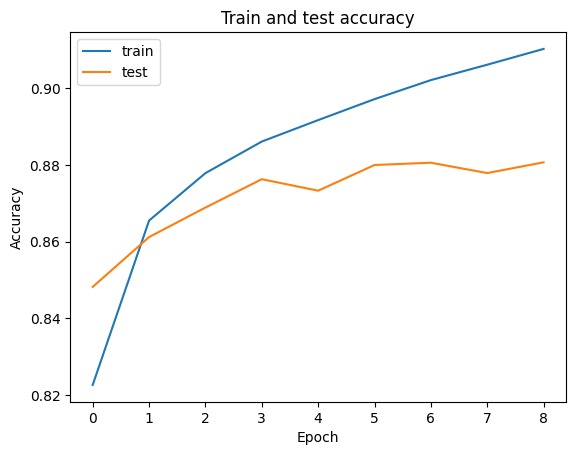

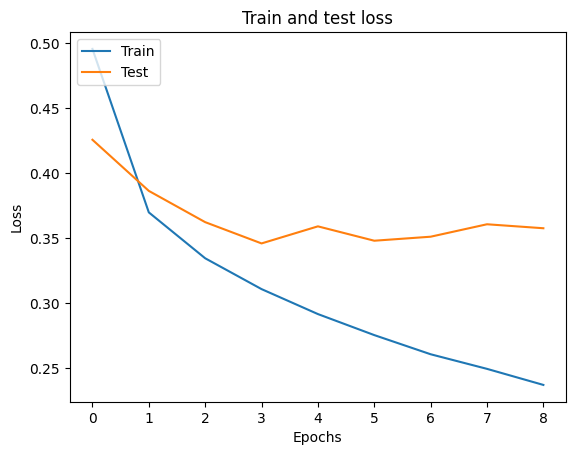

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


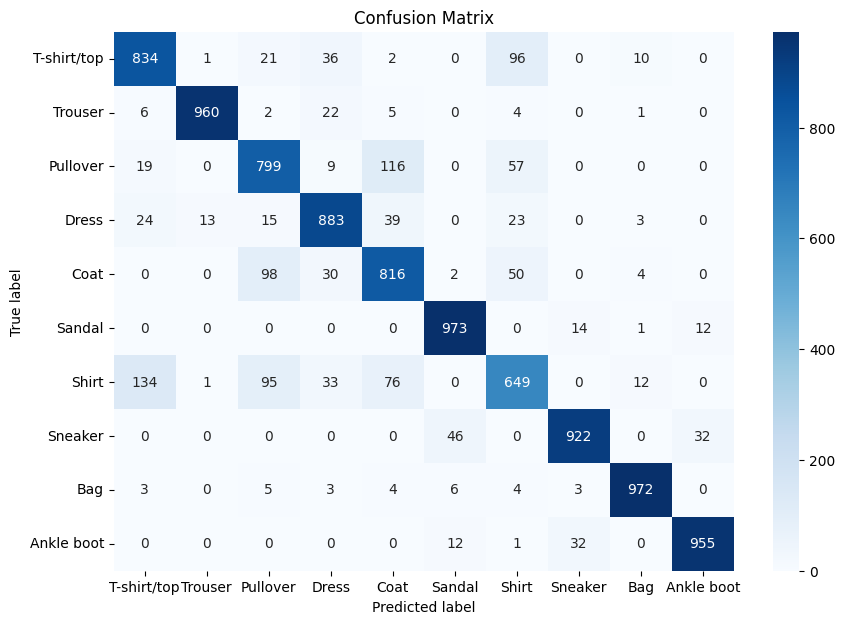

In [36]:
train_model([
	layers.Input(shape=(28,28)),
	layers.Flatten(),
	layers.Dense(64, activation="relu"),
	layers.Dense(256, activation="relu")
])

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7652 - loss: 0.6636 - val_accuracy: 0.8505 - val_loss: 0.4163
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8606 - loss: 0.3837 - val_accuracy: 0.8646 - val_loss: 0.3746
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8744 - loss: 0.3416 - val_accuracy: 0.8677 - val_loss: 0.3670
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8815 - loss: 0.3186 - val_accuracy: 0.8684 - val_loss: 0.3752
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8894 - loss: 0.2984 - val_accuracy: 0.8691 - val_loss: 0.3752
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8940 - loss: 0.2833 - val_accuracy: 0.8693 - val_loss: 0.3601
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8985 - loss: 0.2713 - val_accuracy: 0.8769 - val_loss: 0.3756
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9038 - loss: 0.2573 - 

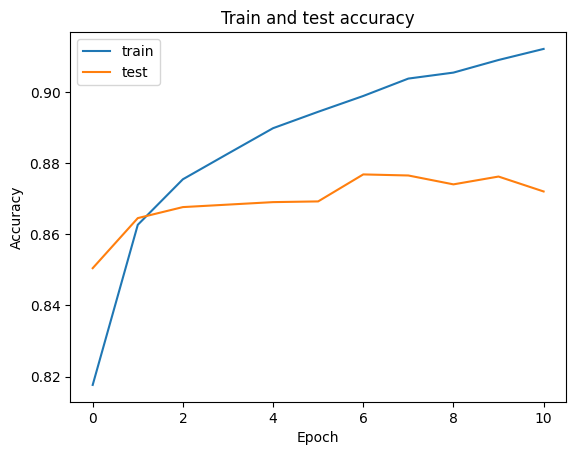

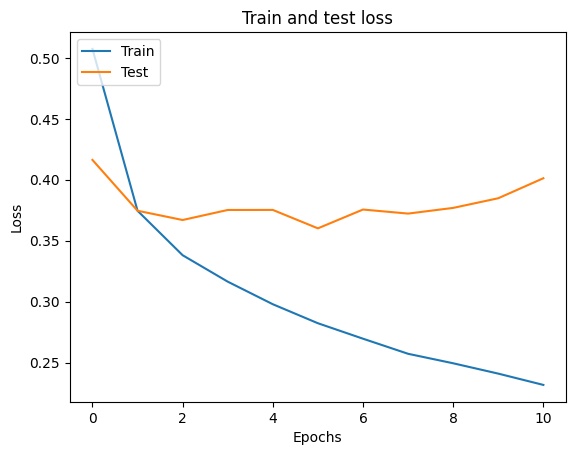

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


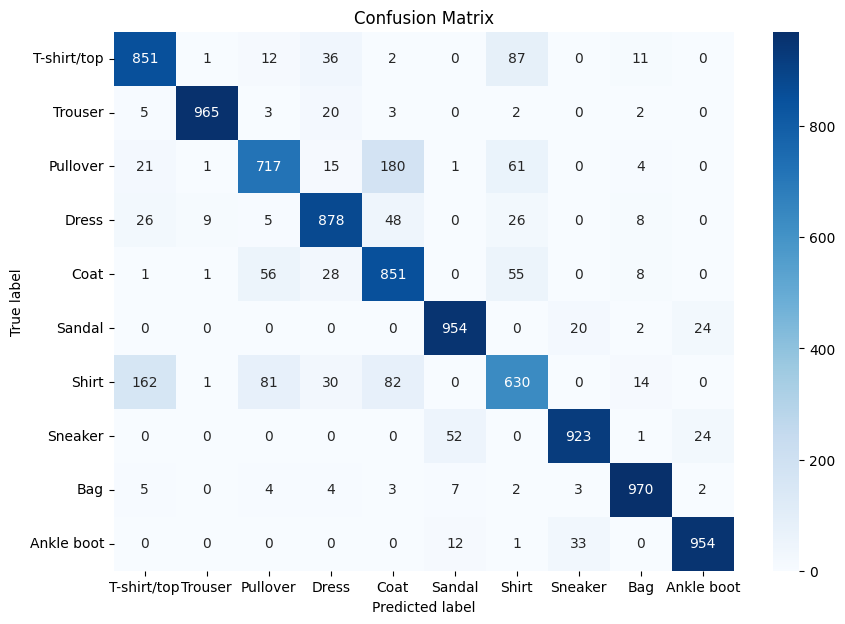

In [37]:
train_model([
	layers.Input(shape=(28,28)),
	layers.Flatten(),
	layers.Dense(64, activation="relu"),
	layers.Dense(64, activation="relu"),
	layers.Dense(256, activation="relu")
])

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7769 - loss: 0.6182 - val_accuracy: 0.8536 - val_loss: 0.4081
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8608 - loss: 0.3768 - val_accuracy: 0.8655 - val_loss: 0.3831
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8762 - loss: 0.3345 - val_accuracy: 0.8705 - val_loss: 0.3606
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8848 - loss: 0.3097 - val_accuracy: 0.8754 - val_loss: 0.3444
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8920 - loss: 0.2865 - val_accuracy: 0.8765 - val_loss: 0.3482
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8967 - loss: 0.2741 - val_accuracy: 0.8736 - val_loss: 0.3630
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9012 - loss: 0.2612 - val_accuracy: 0.8724 - val_loss: 0.3913
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9066 - loss: 0.2480 - 

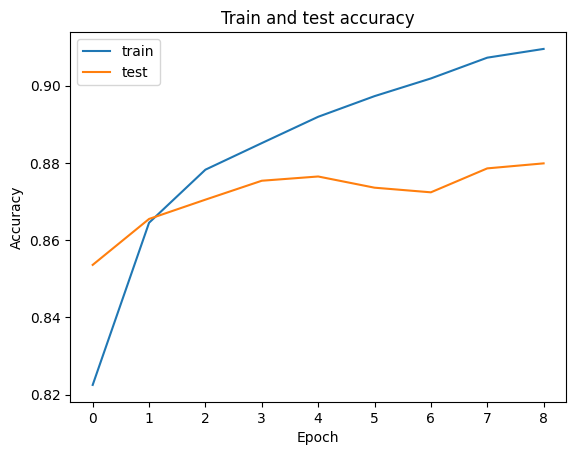

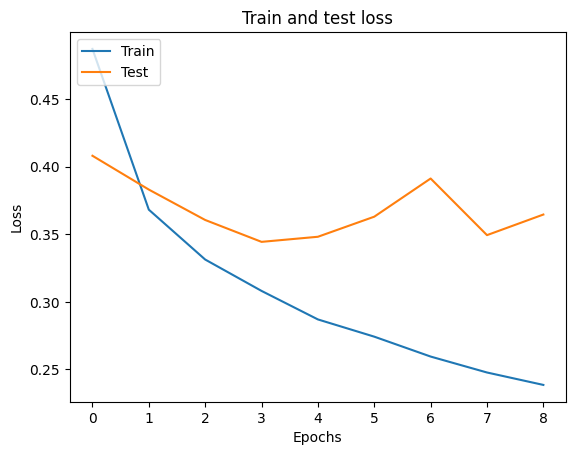

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


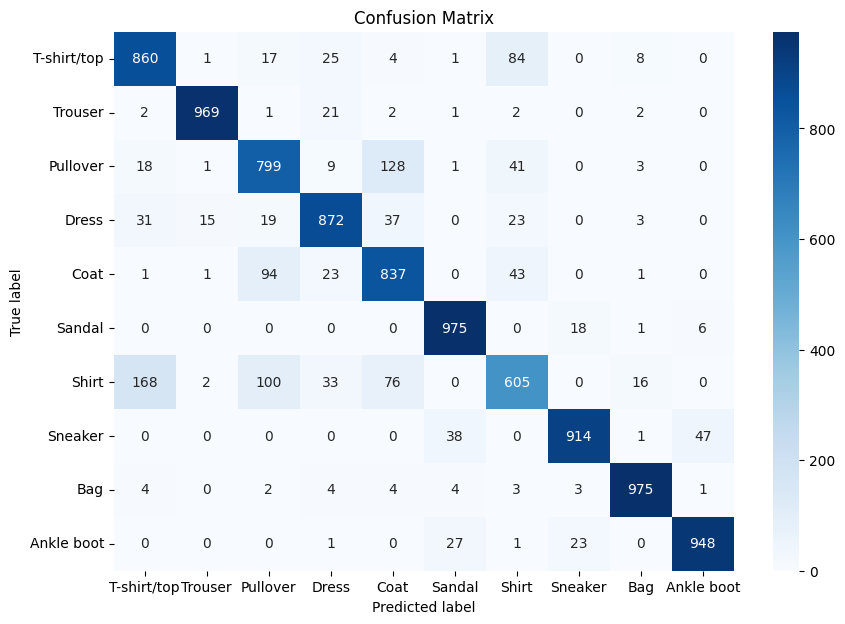

In [38]:
train_model([
	layers.Input(shape=(28,28)),
	layers.Flatten(),
	layers.Dense(256, activation="relu"),
	layers.Dense(64, activation="relu"),
	layers.Dense(512, activation="relu")
])

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7832 - loss: 0.6065 - val_accuracy: 0.8541 - val_loss: 0.4050
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8623 - loss: 0.3730 - val_accuracy: 0.8695 - val_loss: 0.3670
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8777 - loss: 0.3301 - val_accuracy: 0.8731 - val_loss: 0.3648
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8861 - loss: 0.3043 - val_accuracy: 0.8731 - val_loss: 0.3625
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8933 - loss: 0.2833 - val_accuracy: 0.8748 - val_loss: 0.3674
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8987 - loss: 0.2651 - val_accuracy: 0.8740 - val_loss: 0.3643
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9037 - loss: 0.2538 - val_accuracy: 0.8770 - val_loss: 0.3637
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9088 - loss: 0.2410 - 

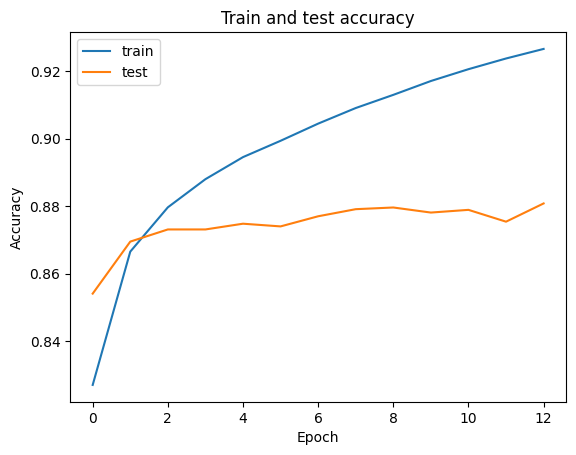

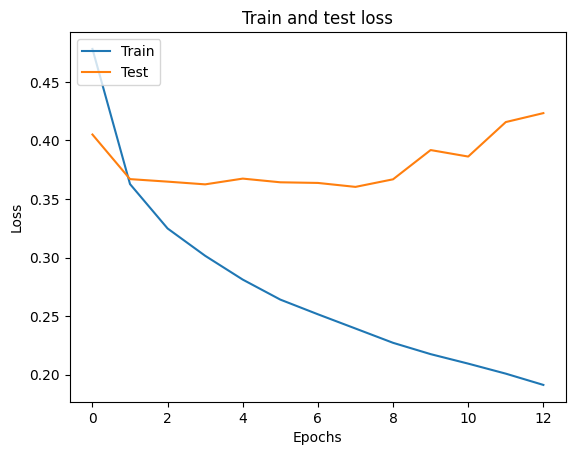

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


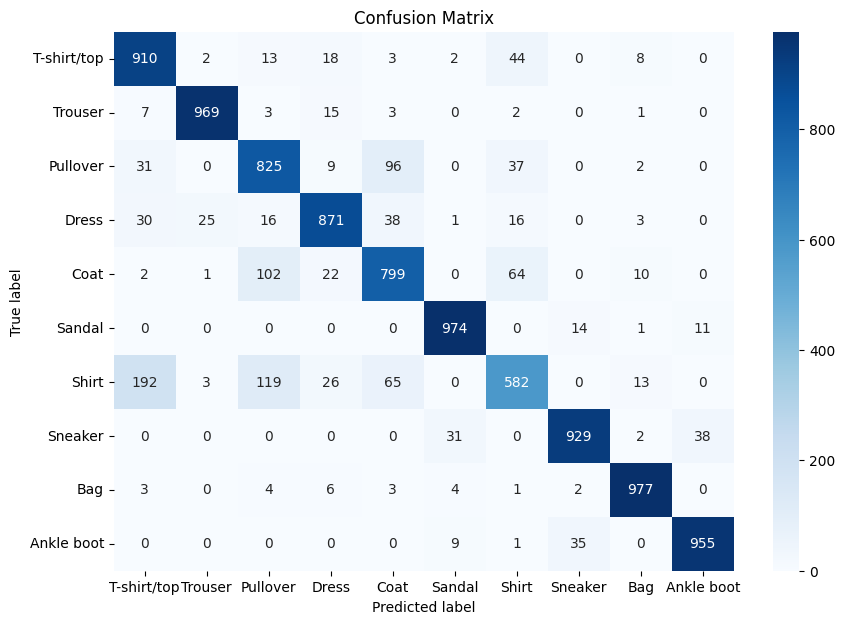

In [39]:
train_model([
	layers.Input(shape=(28,28)),
	layers.Flatten(),
	layers.Dense(128, activation="relu"),
	layers.Dense(256, activation="relu")
])

/home/maxim/.local/share/virtualenvs/ML-As3617Tb/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7720 - loss: 0.6324 - val_accuracy: 0.8820 - val_loss: 0.3276
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8882 - loss: 0.3092 - val_accuracy: 0.9001 - val_loss: 0.2762
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9087 - loss: 0.2502 - val_accuracy: 0.9056 - val_loss: 0.2584
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9224 - loss: 0.2109 - val_accuracy: 0.9098 - val_loss: 0.2525
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9354 - loss: 0.1764 - val_accuracy: 0.9121 - val_loss: 0.2546
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9452 - loss: 0.1506 - val_accuracy: 0.9180 - val_loss: 0.2698
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9529 - loss: 0.1282 - val_accuracy: 0.9099 - val_loss: 0.3336
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9598 - loss:

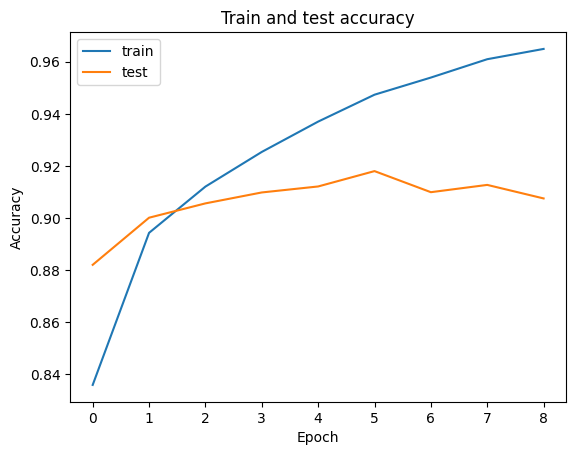

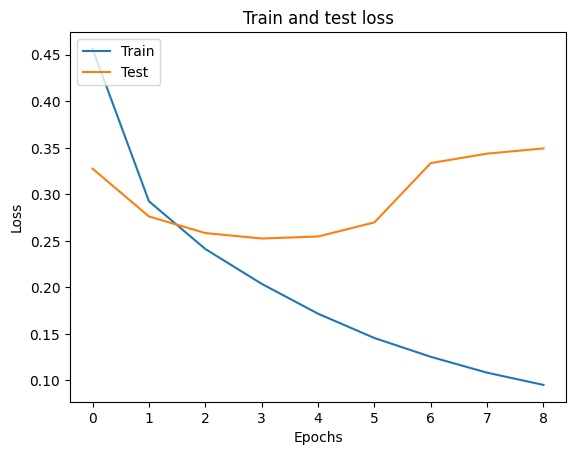

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


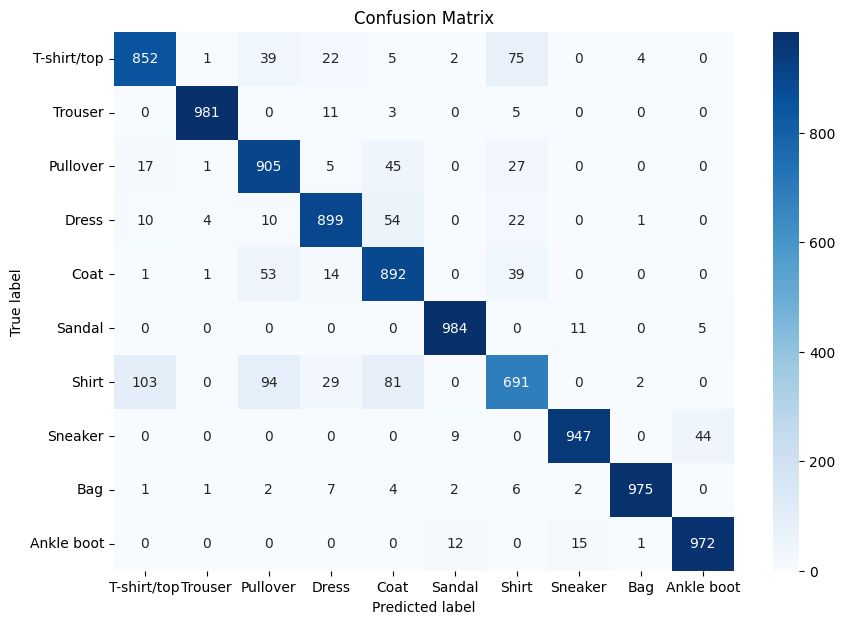

In [40]:
train_model([
	layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
	layers.MaxPooling2D((2, 2)),
	layers.Conv2D(64, (3, 3), activation="relu"),
	layers.Flatten(),
	layers.Dense(32, activation="relu"),
	layers.Dense(64, activation="relu")
])